In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('concrete.csv')
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [6]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Observations:
1- There is null value present in our dataset.

2- Blast,Fly ash, SuperPlasticizer have some zero values.

3-Blast,Fly Ash,Age contain some Outliers.

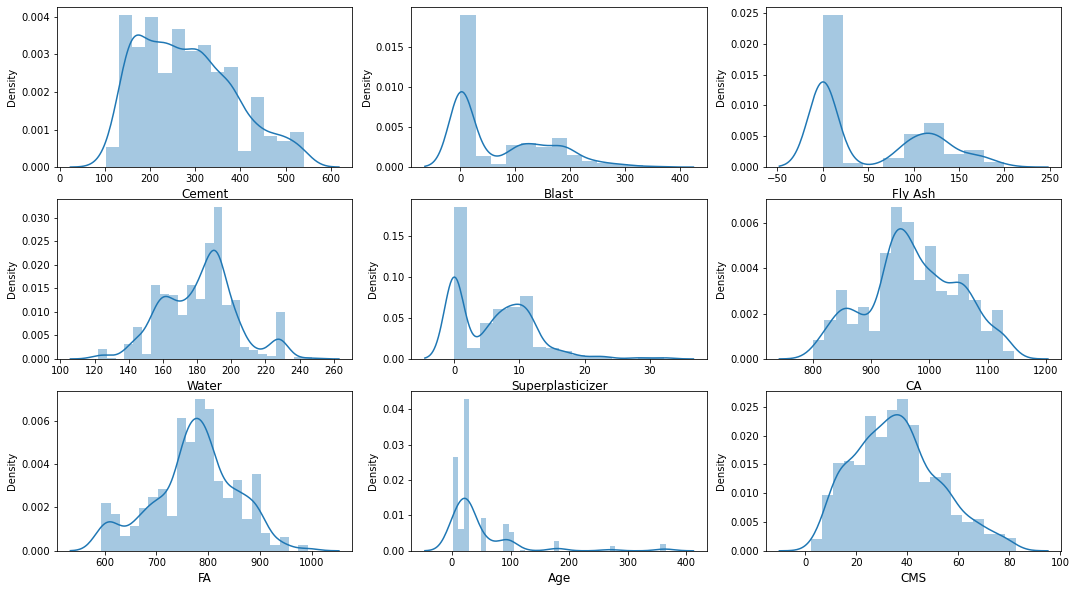

In [12]:
## data Distribution
plt.figure(figsize=(18,10))
plot=1
for col in df:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.show()    

In [17]:
print(df[df[r'Superplasticize']==0].shape)
print(df[df['Fly Ash']==0].shape)
print(df[df['Blast']==0].shape)


(379, 9)
(566, 9)
(471, 9)


Very large portion of superplasticizer,Fly ash,Blast having Zero values. So don't change it.

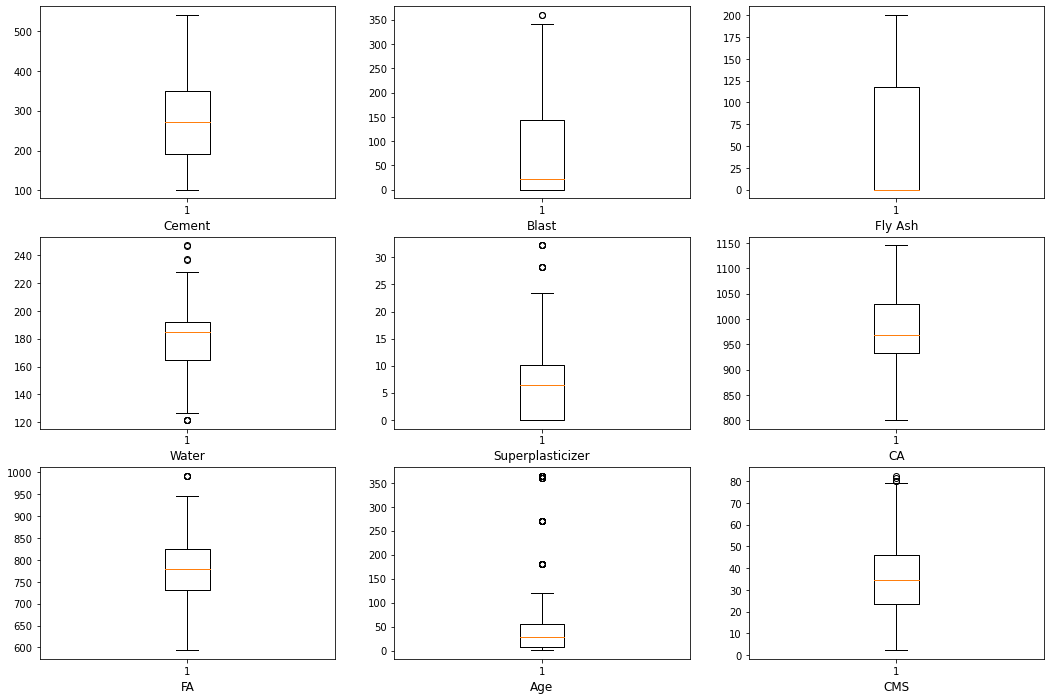

In [19]:
## Checking the outliers
plt.figure(figsize=(18,12))
plot=1
for col in df:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        plt.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1 
plt.show()    
    

In [25]:
# Age
Q1=df['Age'].quantile(.25)
Q3=df['Age'].quantile(.75)
IQR=Q3-Q1
Lower_Age=Q1-1.5*IQR
Upper_Age=Q3+1.5*IQR
print(Lower_Age,Upper_Age)

-66.5 129.5


In [26]:
print(df[df['Age']<-66.5].shape)
print(df[df['Age']>129.5].shape)

(0, 9)
(59, 9)


In [28]:
## Replacing outliers with median values
for col in df.columns[:-1]:
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    
    low=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df.loc[(df[col]<low)|(df[col]>upper),col]=df[col].median()

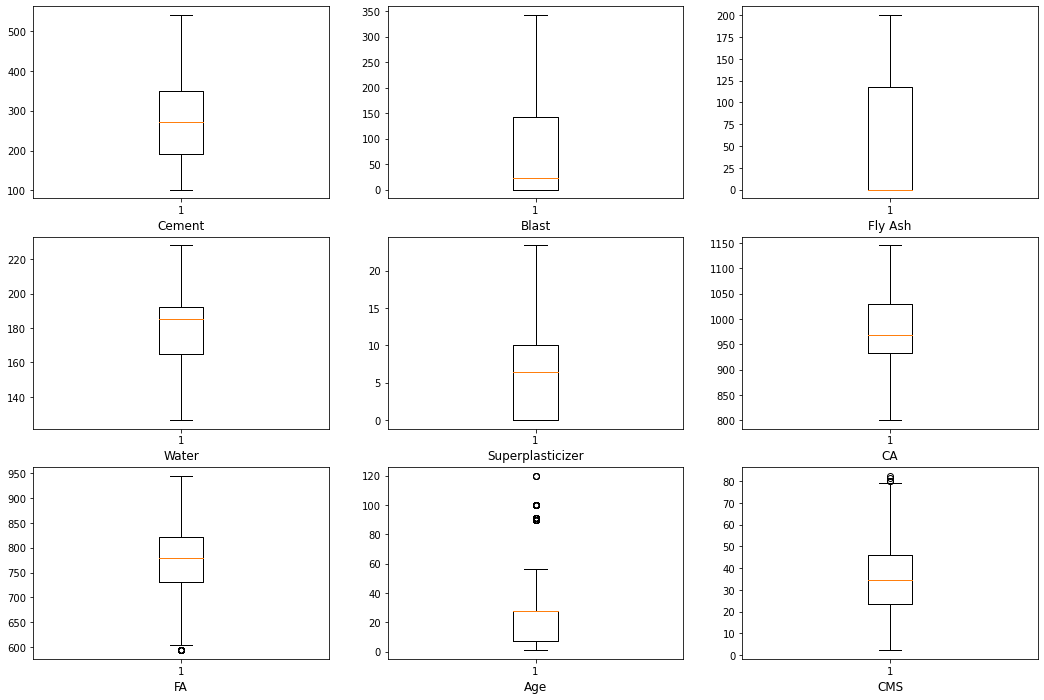

In [30]:
## Check the bOx plot again
## Checking the outliers
plt.figure(figsize=(18,12))
plot=1
for col in df:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        plt.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1 
plt.show()    
    

Outliers has been replaced

[]

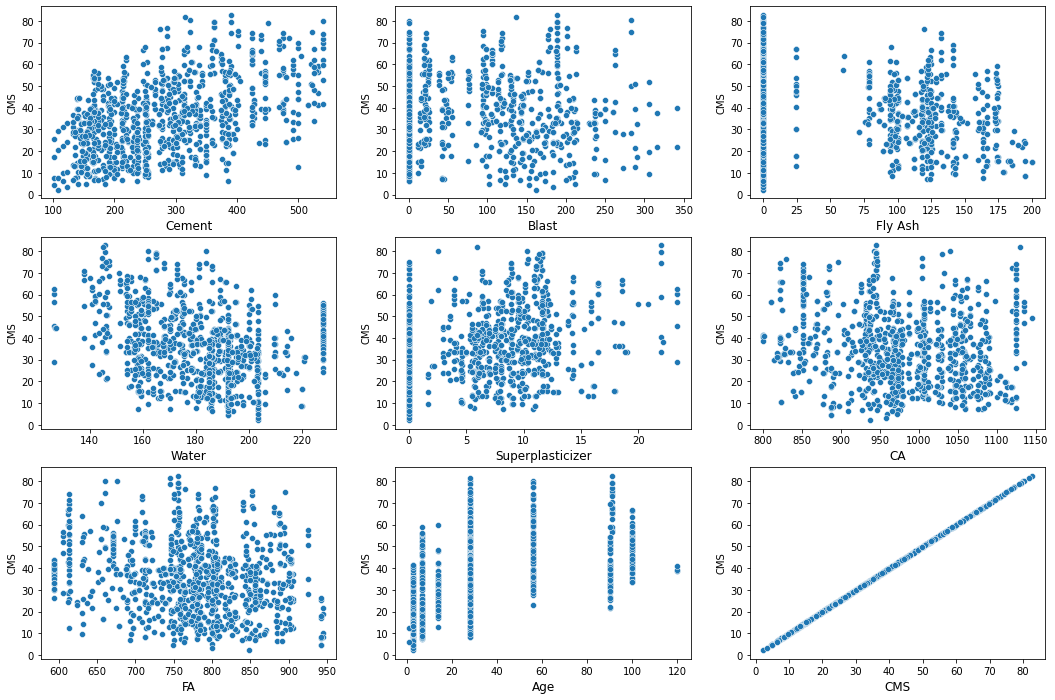

In [37]:
## Checking the Relation 
plt.figure(figsize=(18,12))
plot=1 
for col in df[:-1]:
    ax=plt.subplot(3,3,plot)
    sns.scatterplot(df[col],df['CMS'])
    plt.xlabel(col,fontsize=12)
    plot+=1
plt.plot()    

<AxesSubplot:>

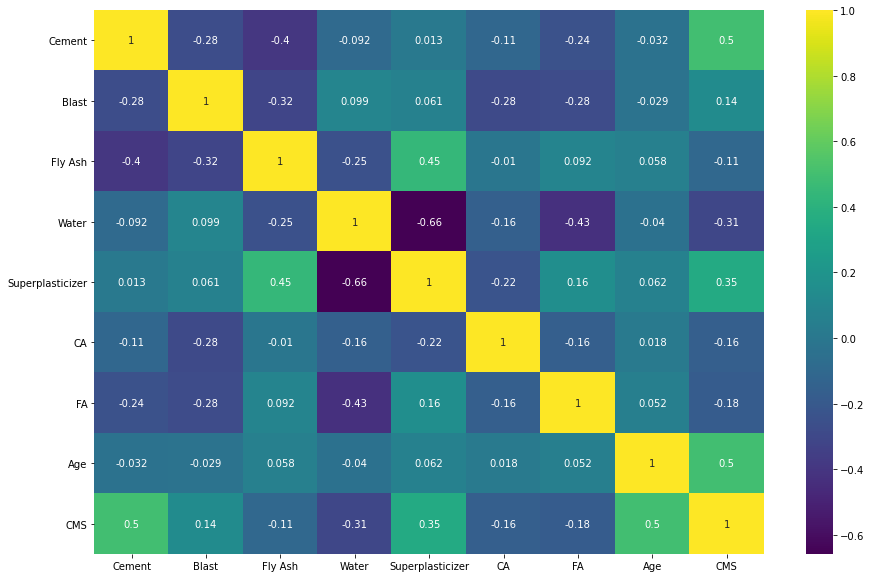

In [40]:
## Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [42]:
## Checking the Multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from  sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [44]:
x=df.drop('CMS',axis=1)
y=df['CMS']

In [46]:
x_scale=ss.fit_transform(x)
x_scale

array([[ 2.47791487, -0.8581924 , -0.84714393, ...,  0.86315424,
        -1.22730564, -0.15315867],
       [ 2.47791487, -0.8581924 , -0.84714393, ...,  1.05616419,
        -1.22730564, -0.15315867],
       [ 0.49142531,  0.81154111, -0.84714393, ..., -0.52651741,
        -2.26970038, -0.15315867],
       ...,
       [-1.27008832,  0.77521708,  0.85063487, ..., -1.03606368,
         0.09475598, -0.15315867],
       [-1.16860982,  1.32945143, -0.84714393, ...,  0.21464081,
         0.20789394, -0.15315867],
       [-0.19403325,  0.31940913,  0.3769452 , ..., -1.39506219,
        -0.14041845, -0.15315867]])

In [49]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scale,i) for i in range (x_scale.shape[1])]
vif['Feature']=x.columns

vif

,vif,Feature
0,5.723235,Cement
1,5.399680,Blast
2,4.673905,Fly Ash
3,5.397722,Water
4,3.063127,Superplasticizer
5,3.636605,CA
6,5.037943,FA
7,1.011119,Age


# Train_Test_Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((772, 8), (258, 8), (772,), (258,))

# Building Different Models

In [52]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LarsCV,RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Training data 0.7310778375686686
Testing Data 0.6641808336460999
MAE: 7.189912005983412
MSE: 93.14307618545735
RSME: 9.651066064713127
R_2 score: 0.6641808336460999


<AxesSubplot:xlabel='CMS', ylabel='Density'>

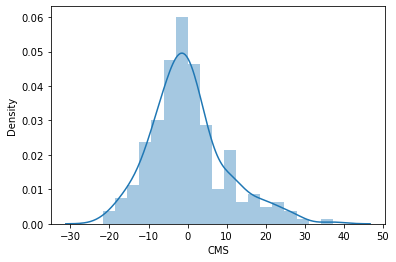

In [57]:
## Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Training data',lr.score(x_train,y_train))
print('Testing Data',lr.score(x_test,y_test))
pred=lr.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)

Training data 0.6960969343021814
Testing Data 0.6505782170223988
MAE: 7.503096708294824
MSE: 96.91590895810427
RSME: 9.844587800314661
R_2 score: 0.6505782170223988


<AxesSubplot:xlabel='CMS', ylabel='Density'>

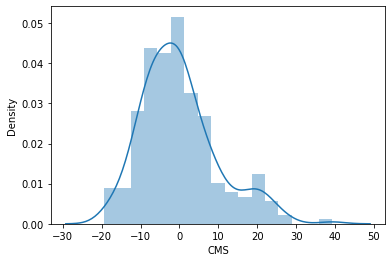

In [59]:
##LAsso Regression-----> 
lasso=Lasso()
lasso.fit(x_train,y_train)
print('Training data',lasso.score(x_train,y_train))
print('Testing Data',lasso.score(x_test,y_test))
pred=lasso.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)


Training data 0.7310714143380926
Testing Data 0.6642172361550793
MAE: 7.189176375726411
MSE: 93.13297955605996
RSME: 9.650542966903984
R_2 score: 0.6642172361550793


<AxesSubplot:xlabel='CMS', ylabel='Density'>

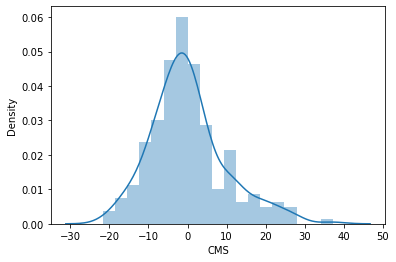

In [61]:
ridge=Ridge()
ridge.fit(x_train,y_train)
print('Training data',ridge.score(x_train,y_train))
print('Testing Data',ridge.score(x_test,y_test))
pred=ridge.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)


Training data 0.9810967883166015
Testing Data 0.8872380537374023
MAE: 3.9763256041589763
MSE: 31.27574481704568
RSME: 5.592472156126098
R_2 score: 0.8872380537374023


<AxesSubplot:xlabel='CMS', ylabel='Density'>

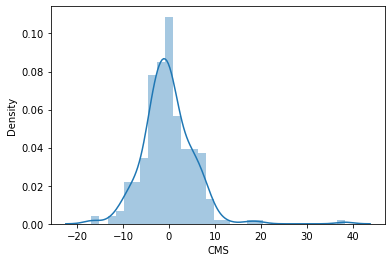

In [62]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print('Training data',rf.score(x_train,y_train))
print('Testing Data',rf.score(x_test,y_test))
pred=rf.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)


# Random Forest Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(rf,x,y,cv=20,scoring='r2')
print('cross_val score:',cross_validation)
print('Avg of cross Validation',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())


cross_val score: [0.55489469 0.83732436 0.39327406 0.96033386 0.77437999 0.81869506
 0.62897493 0.68984237 0.41278832 0.52666964 0.78606471 0.68230803
 0.88250286 0.85318841 0.85834557 0.81259705 0.90096326 0.94420875
 0.88208108 0.955387  ]
Avg of cross Validation 0.7577411991740066
Standard Deviation: 0.16926834593636403


Training data 0.7618607920407189
Testing Data 0.6916210521690042
MAE: 6.946695090439277
MSE: 85.53223493367784
RSME: 9.248363905776948
R_2 score: 0.6916210521690042


<AxesSubplot:xlabel='CMS', ylabel='Density'>

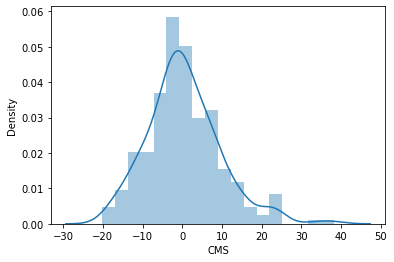

In [75]:
###Knn
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=15)
kn.fit(x_train,y_train)
print('Training data',kn.score(x_train,y_train))
print('Testing Data',kn.score(x_test,y_test))
pred=kn.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)

# Cross Validation for KNN


In [91]:
cross_validation=cross_val_score(kn,x,y,cv=20,scoring='r2')
print('cross_val score for KNN :',cross_validation)
print('Avg of cross Validation for KNN : ',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())


cross_val score for KNN : [-0.00877701 -1.57713591 -1.07343692  0.74374536  0.47982078  0.61593357
 -0.24918659  0.24641866 -0.40885764  0.18114975  0.39256167  0.24061845
  0.3474718   0.26890515  0.5095      0.65051784  0.58152318  0.72380272
  0.64451447  0.65254908]
Avg of cross Validation for KNN :  0.19808191991396998
Standard Deviation: 0.5971439879949562


In [77]:
## Bagging Regressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor


Training data 0.8259479054859047
Testing Data 0.7776950778879552
MAE: 6.458291906745869
MSE: 61.6586733910933
RSME: 7.852303699621742
R_2 score: 0.7776950778879552


<AxesSubplot:xlabel='CMS', ylabel='Density'>

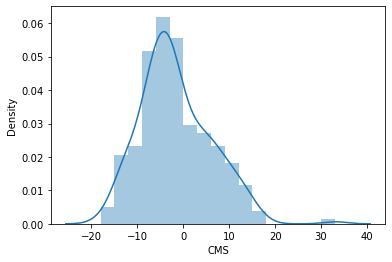

In [78]:
## AdaBoost Regresssor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print('Training data',abr.score(x_train,y_train))
print('Testing Data',abr.score(x_test,y_test))
pred=abr.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)

# Cross Validation for Adaboost

In [90]:
cross_validation=cross_val_score(abr,x,y,cv=20,scoring='r2')
print('cross_val score for Ada Boost :',cross_validation)
print('Avg of cross Validation for Ada Boost : ',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())


cross_val score for Ada Boost : [0.49724377 0.54226234 0.21686167 0.85672933 0.76297695 0.75320407
 0.58042292 0.69024286 0.52506583 0.55946702 0.61498994 0.25233396
 0.45472957 0.71600769 0.6289131  0.68634091 0.60335198 0.55835278
 0.52328084 0.64468362]
Avg of cross Validation for Ada Boost :  0.5833730569044946
Standard Deviation: 0.15173380072595508


Training data 0.9462715822020151
Testing Data 0.8863900126265334
MAE: 4.226280551465354
MSE: 31.510958186954447
RSME: 5.61346222815781
R_2 score: 0.8863900126265334


<AxesSubplot:xlabel='CMS', ylabel='Density'>

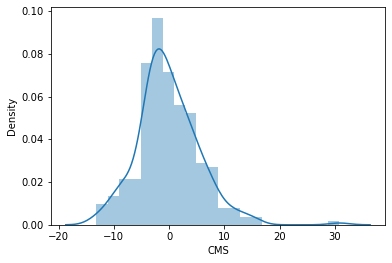

In [79]:
##Gradient Boosting
gd=GradientBoostingRegressor()
gd.fit(x_train,y_train)
print('Training data',gd.score(x_train,y_train))
print('Testing Data',gd.score(x_test,y_test))
pred=gd.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)

# Cross Validation for Gradient Boost

In [89]:
cross_validation=cross_val_score(gd,x,y,cv=20,scoring='r2')
print('cross_val score for gradient Boost :',cross_validation)
print('Avg of cross Validation for gradient Boost : ',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())


cross_val score for gradient Boost : [0.69625971 0.81096347 0.43322808 0.96684385 0.83808997 0.82747991
 0.71625952 0.67044405 0.56750333 0.59976947 0.83210628 0.68969531
 0.85485137 0.87697698 0.85512069 0.86969981 0.79059135 0.85079633
 0.80486722 0.84344061]
Avg of cross Validation for gradient Boost :  0.7697493652406756
Standard Deviation: 0.1244381166601016


Training data 0.9462715822020151
Testing Data 0.8863900126265334
MAE: 4.226280551465354
MSE: 31.510958186954447
RSME: 5.61346222815781
R_2 score: 0.8863900126265334


<AxesSubplot:xlabel='CMS', ylabel='Density'>

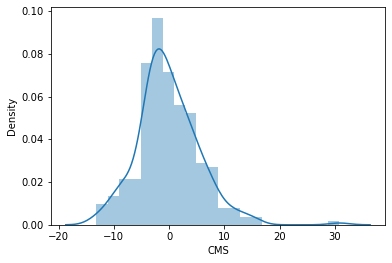

In [86]:
## Bagging Regressor
br=BaggingRegressor()
br.fit(x_train,y_train)
print('Training data',gd.score(x_train,y_train))
print('Testing Data',gd.score(x_test,y_test))
pred=gd.predict(x_test)
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(mean_squared_error(y_test,pred)))
print('R_2 score:',r2_score(y_test,pred))
sns.distplot(y_test-pred)

# Cross Validation for Bagging Regressor

In [88]:
cross_validation=cross_val_score(br,x,y,cv=20,scoring='r2')
print('cross_val score for Bagging Regressor :',cross_validation)
print('Avg of cross Validation for Bagging Regressor : ',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())


cross_val score for Bagging Regressor : [0.61944292 0.81818656 0.34651634 0.95604832 0.84355762 0.83571209
 0.63706163 0.64973465 0.29898499 0.37133057 0.76667374 0.69767015
 0.83968284 0.85730605 0.81234758 0.83448866 0.87721048 0.93333553
 0.86710349 0.92950914]
Avg of cross Validation for Bagging Regressor :  0.7395951674067501
Standard Deviation: 0.19233148142345344


# Conclusion---Gradient Boosting Regressor is best with R2_score=76.97

# save the model

In [94]:
import pickle
file='concrete_gd.pkl'
pickle.dump(gd,open(file,'wb'))